### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [403]:
### Data Collection
import pandas_datareader as pdr
key=""

In [404]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [283]:
df.to_csv('AAPL.csv')

In [405]:
import pandas as pd

In [406]:
df=pd.read_csv('AAPL.csv')

In [93]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [183]:
df = web.DataReader('ITC.NS', data_source='yahoo', start='2012-01-01', end='2022-05-01')

In [185]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,134.566666,131.933334,134.566666,132.433334,2860839.0,102.725311
2012-01-03,134.366669,132.866669,133.233337,133.566666,6065590.0,103.604393
2012-01-04,134.466660,132.333328,134.333328,133.033340,11875083.0,103.190727
2012-01-05,133.333328,131.733337,132.699997,133.199997,11364489.0,103.319984
2012-01-06,135.399994,132.233337,132.699997,134.733337,8788212.0,104.509361


In [186]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-25,259.000000,252.500000,258.799988,255.250000,24208645.0,255.250000
2022-04-26,260.700012,256.250000,256.600006,258.950012,20536714.0,258.950012
2022-04-27,258.500000,255.750000,256.200012,257.500000,16580824.0,257.500000
2022-04-28,263.700012,258.149994,259.500000,261.100006,27924384.0,261.100006
2022-04-29,263.000000,258.500000,263.000000,259.549988,20419904.0,259.549988


In [187]:
df1=df.reset_index()['Close']

In [188]:
df1

0       132.433334
1       133.566666
2       133.033340
3       133.199997
4       134.733337
           ...    
2540    255.250000
2541    258.950012
2542    257.500000
2543    261.100006
2544    259.549988
Name: Close, Length: 2545, dtype: float64

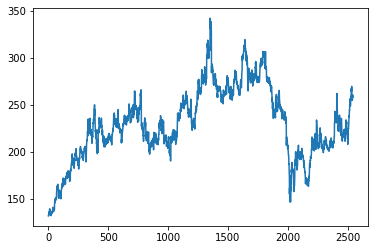

In [189]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [190]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [191]:
import numpy as np

In [192]:
df1

0       132.433334
1       133.566666
2       133.033340
3       133.199997
4       134.733337
           ...    
2540    255.250000
2541    258.950012
2542    257.500000
2543    261.100006
2544    259.549988
Name: Close, Length: 2545, dtype: float64

In [193]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [194]:
print(df1)

[[0.        ]
 [0.0053951 ]
 [0.00285627]
 ...
 [0.59536655]
 [0.61250399]
 [0.6051253 ]]


In [195]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [196]:
training_size,test_size

(1908, 637)

In [197]:
train_data

array([[0.        ],
       [0.0053951 ],
       [0.00285627],
       ...,
       [0.58774989],
       [0.61512215],
       [0.59417645]])

In [198]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [199]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [200]:
print(X_train.shape), print(y_train.shape)

(1847, 60)
(1847,)


(None, None)

In [201]:
print(X_test.shape), print(ytest.shape)

(576, 60)
(576,)


(None, None)

In [202]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [203]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [204]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [205]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_16 (LSTM)              (None, 60, 50)            20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [206]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_16 (LSTM)              (None, 60, 50)            20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [207]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
29/29 [==============================] - 9s 141ms/step - loss: 0.0421 - val_loss: 0.0082
Epoch 2/100
29/29 [==============================] - 3s 102ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 3/100
29/29 [==============================] - 3s 102ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 4/100
29/29 [==============================] - 3s 101ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 5/100
29/29 [==============================] - 3s 101ms/step - loss: 0.0021 - val_loss: 0.0031
Epoch 6/100
29/29 [==============================] - 3s 101ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 7/100
29/29 [==============================] - 3s 101ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 8/100
29/29 [==============================] - 3s 101ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 9/100
29/29 [==============================] - 3s 102ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 10/100
29/29 [==============================] - 3s 101ms/step - loss: 0.0018 - val_lo

29/29 [==============================] - 3s 102ms/step - loss: 4.9546e-04 - val_loss: 5.7779e-04
Epoch 79/100
29/29 [==============================] - 3s 101ms/step - loss: 4.2062e-04 - val_loss: 5.6183e-04
Epoch 80/100
29/29 [==============================] - 3s 102ms/step - loss: 4.4684e-04 - val_loss: 5.7069e-04
Epoch 81/100
29/29 [==============================] - 3s 101ms/step - loss: 3.8718e-04 - val_loss: 5.4047e-04
Epoch 82/100
29/29 [==============================] - 3s 104ms/step - loss: 3.7340e-04 - val_loss: 5.2602e-04
Epoch 83/100
29/29 [==============================] - 3s 102ms/step - loss: 4.1889e-04 - val_loss: 5.7998e-04
Epoch 84/100
29/29 [==============================] - 3s 102ms/step - loss: 3.6344e-04 - val_loss: 5.2743e-04
Epoch 85/100
29/29 [==============================] - 3s 106ms/step - loss: 3.8459e-04 - val_loss: 5.0941e-04
Epoch 86/100
29/29 [==============================] - 3s 102ms/step - loss: 3.6525e-04 - val_loss: 5.1940e-04
Epoch 87/100
29/29 [===

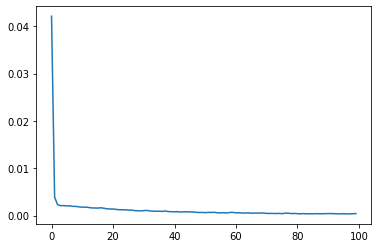

In [208]:
loss = model.history.history['loss']
plt.plot(loss)

In [209]:
import tensorflow as tf

In [210]:
tf.__version__

'2.8.0'

In [211]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [212]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [213]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

242.43651328179098

In [214]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

210.26084458690417

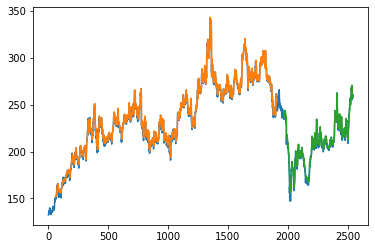

In [215]:
### Plotting 
# shift train predictions for plotting
look_back=60
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [216]:
len(test_data)

637

In [217]:
x_input=test_data[577:].reshape(1,-1)
x_input.shape


(1, 60)

In [218]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [219]:
temp_input

[0.45374484026176065,
 0.4746905428218594,
 0.485639462511937,
 0.48492543253473597,
 0.4654077899290393,
 0.47040621768297053,
 0.4651697557240252,
 0.47516661123188764,
 0.4761186754141028,
 0.4142335592781804,
 0.43113297090440417,
 0.4299428725171749,
 0.4294668041071469,
 0.42589650894545905,
 0.4073310031598186,
 0.39233579253586626,
 0.3975721818569703,
 0.3621072644451061,
 0.3880513947591361,
 0.39709618608478336,
 0.3944779551053107,
 0.4139955250731663,
 0.44303395477669716,
 0.4404157237972245,
 0.4496984766900446,
 0.4608854305851363,
 0.47397651284465836,
 0.4946842538375843,
 0.5072992676870781,
 0.50182484416096,
 0.5244367135183162,
 0.5353855605705528,
 0.5334814322061222,
 0.5584734983379372,
 0.5691843838230007,
 0.5827515344925508,
 0.5756109441691751,
 0.5932243131347593,
 0.5815614361053215,
 0.5558552673584646,
 0.5627578234768261,
 0.5753729099641612,
 0.5856077270391965,
 0.604649373872706,
 0.6053634038499073,
 0.591320184770329,
 0.6443985437856184,
 0.64297

In [220]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<30):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.60831857]
61
1 day input [0.47469054 0.48563946 0.48492543 0.46540779 0.47040622 0.46516976
 0.47516661 0.47611868 0.41423356 0.43113297 0.42994287 0.4294668
 0.42589651 0.407331   0.39233579 0.39757218 0.36210726 0.38805139
 0.39709619 0.39447796 0.41399553 0.44303395 0.44041572 0.44969848
 0.46088543 0.47397651 0.49468425 0.50729927 0.50182484 0.52443671
 0.53538556 0.53348143 0.5584735  0.56918438 0.58275153 0.57561094
 0.59322431 0.58156144 0.55585527 0.56275782 0.57537291 0.58560773
 0.60464937 0.6053634  0.59132018 0.64439854 0.64297048 0.63011736
 0.65272923 0.65534754 0.61464608 0.6051253  0.60917166 0.61250399
 0.58465566 0.60226918 0.59536655 0.61250399 0.6051253  0.60831857]
1 day output [[0.6105745]]
2 day input [0.48563946 0.48492543 0.46540779 0.47040622 0.46516976 0.47516661
 0.47611868 0.41423356 0.43113297 0.42994287 0.4294668  0.42589651
 0.407331   0.39233579 0.39757218 0.36210726 0.38805139 0.39709619
 0.39447796 0.41399553 0.44303395 0.44041572 0.44969848 0.4608

 0.64283794 0.64706755 0.65126044 0.65540111 0.65947926 0.66348791]
15 day output [[0.66742253]]
16 day input [0.39757218 0.36210726 0.38805139 0.39709619 0.39447796 0.41399553
 0.44303395 0.44041572 0.44969848 0.46088543 0.47397651 0.49468425
 0.50729927 0.50182484 0.52443671 0.53538556 0.53348143 0.5584735
 0.56918438 0.58275153 0.57561094 0.59322431 0.58156144 0.55585527
 0.56275782 0.57537291 0.58560773 0.60464937 0.6053634  0.59132018
 0.64439854 0.64297048 0.63011736 0.65272923 0.65534754 0.61464608
 0.6051253  0.60917166 0.61250399 0.58465566 0.60226918 0.59536655
 0.61250399 0.6051253  0.60831857 0.61057448 0.61409754 0.61801761
 0.62202948 0.62607986 0.63018984 0.63436794 0.63859475 0.64283794
 0.64706755 0.65126044 0.65540111 0.65947926 0.66348791 0.66742253]
16 day output [[0.67128086]]
17 day input [0.36210726 0.38805139 0.39709619 0.39447796 0.41399553 0.44303395
 0.44041572 0.44969848 0.46088543 0.47397651 0.49468425 0.50729927
 0.50182484 0.52443671 0.53538556 0.53348143

In [221]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [222]:
import matplotlib.pyplot as plt

In [223]:
len(df1)

2545

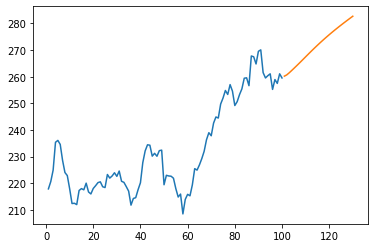

In [224]:
plt.plot(day_new,scaler.inverse_transform(df1[2445:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

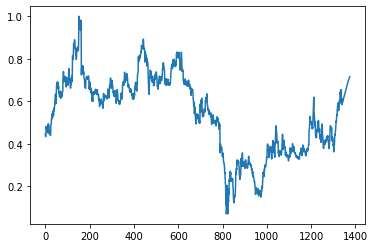

In [225]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

df3=scaler.inverse_transform(df3).tolist()

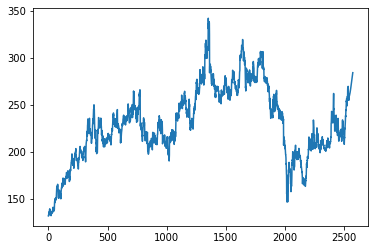

In [138]:
plt.plot(df3)

In [92]:
model.save('itc.h5')